In [1]:
'''
First, define the environment. In this example, we are only using price data to initialize our state space
'''
from tradingtensors.Environments.CustomEnvs import OandaEnv

env = OandaEnv(
    INSTRUMENT = "EUR_USD", 
    TIMEFRAME = "H1", 
    lookback_period= 3, #Using the previous 3 Hourly Return, Default= '(Open-LastOpen)/LastOpen'
    trade_duration=3 #Hold every trades for 3 hours
    #PORTFOLIO_TYPE='FIXED PERIOD' #Default Type
)

C:\Users\Henry\Anaconda2\envs\tensorflow\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
'''
The Learning Agent -> DQN

Adjust hyperparameters and other model settings:
-> ./settings/DQNsettings
'''

from tradingtensors.Agents.Q_learning import DQNAgent

PATH = r'Enter destination folder here'

agent = DQNAgent(
    env= env,
    PARENT_PATH = PATH, #Path to save your models
    hidden_layers=[128, 64, 32]
)

'''And the agent is ready for training'''

'And the agent is ready for training'

# Train/Test Mode

<img src='./images/AgentEnv.JPG'/>

In [3]:
'''
Two things are happening under the hood to improve the stability of DQN:
- Experience Replay: Sampling transition tuples (s, a, r, s') with equal probability during SGD. Experiences can be reused
- Target Network: Freeze the Online Network to improve bootstrapping of TD-Target
'''

agent.train(
    #DEFAULT SETTINGS
    policy_measure = 'optimal', # either 'optimal', 'highest' or 'average'
    
    BATCH_SIZE = 32,
    CONVERGENCE_THRESHOLD = 500, 
    EPISODES_TO_EXPLORE = 30,
    TRAIN_EPISODES = 200
)

End of Episode 1, Total Reward is -80.9, Average Reward is -0.826
Percentage of time spent on exploring (Random Action): 96 %

End of Episode 2, Total Reward is -172.9, Average Reward is -1.695
Percentage of time spent on exploring (Random Action): 93 %

End of Episode 3, Total Reward is -126.2, Average Reward is -1.301
Percentage of time spent on exploring (Random Action): 90 %

End of Episode 4, Total Reward is 112.8, Average Reward is 1.095
Percentage of time spent on exploring (Random Action): 86 %

End of Episode 5, Total Reward is -195.9, Average Reward is -1.940
Percentage of time spent on exploring (Random Action): 83 %

End of Episode 6, Total Reward is -281.0, Average Reward is -2.897
Percentage of time spent on exploring (Random Action): 80 %

End of Episode 7, Total Reward is -33.5, Average Reward is -0.332
Percentage of time spent on exploring (Random Action): 77 %

End of Episode 8, Total Reward is 218.5, Average Reward is 2.207
Percentage of time spent on exploring (Rand

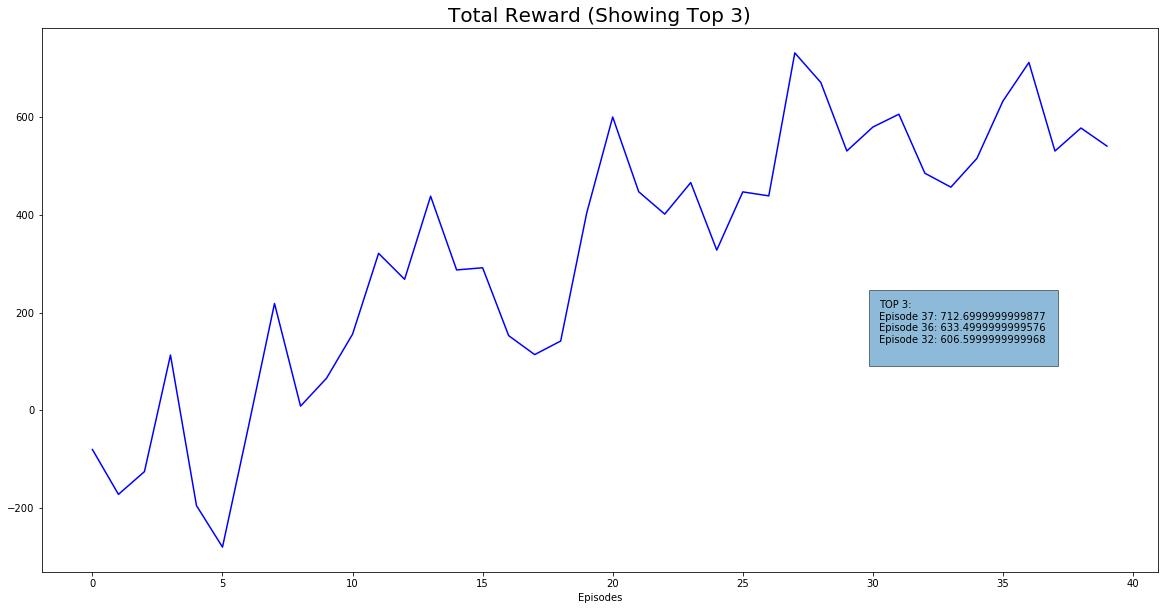

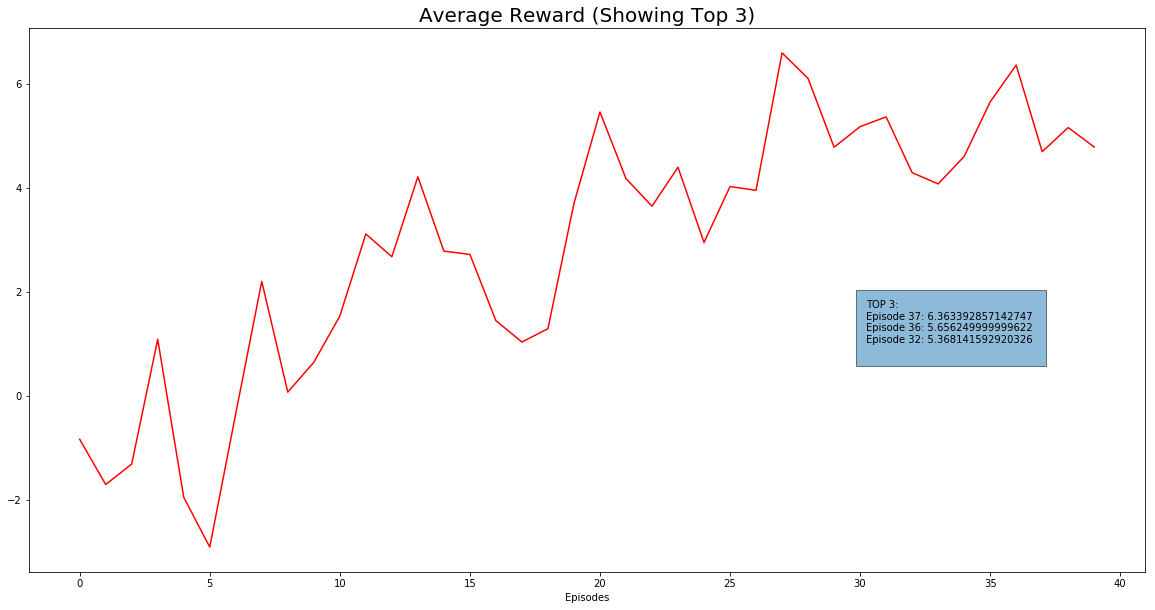


########   RANK 1   ###########
Episode          | 37
Total Reward     | 712.70
Average Reward   | 6.36
################################


########   RANK 2   ###########
Episode          | 36
Total Reward     | 633.50
Average Reward   | 5.66
################################


########   RANK 3   ###########
Episode          | 32
Total Reward     | 606.60
Average Reward   | 5.37
################################


########   RANK 4   ###########
Episode          | 31
Total Reward     | 580.20
Average Reward   | 5.18
################################


########   RANK 5   ###########
Episode          | 39
Total Reward     | 578.30
Average Reward   | 5.16
################################


########   RANK 6   ###########
Episode          | 40
Total Reward     | 541.20
Average Reward   | 4.79
################################


########   RANK 7   ###########
Episode          | 38
Total Reward     | 531.10
Average Reward   | 4.70
################################


########   RANK 8   ######

In [4]:
agent.trainSummary()

Summary Statistics for Episode 37 

Total Trades            | 112        (Buy)58       (Sell)54 
Profit (in pips)        | 712.70   (Buy)356.00   (Sell)356.70
Win Ratio               | 67.86%    (Buy)68.97%   (Sell)66.67 %
Average Trade Duration  | 2.98


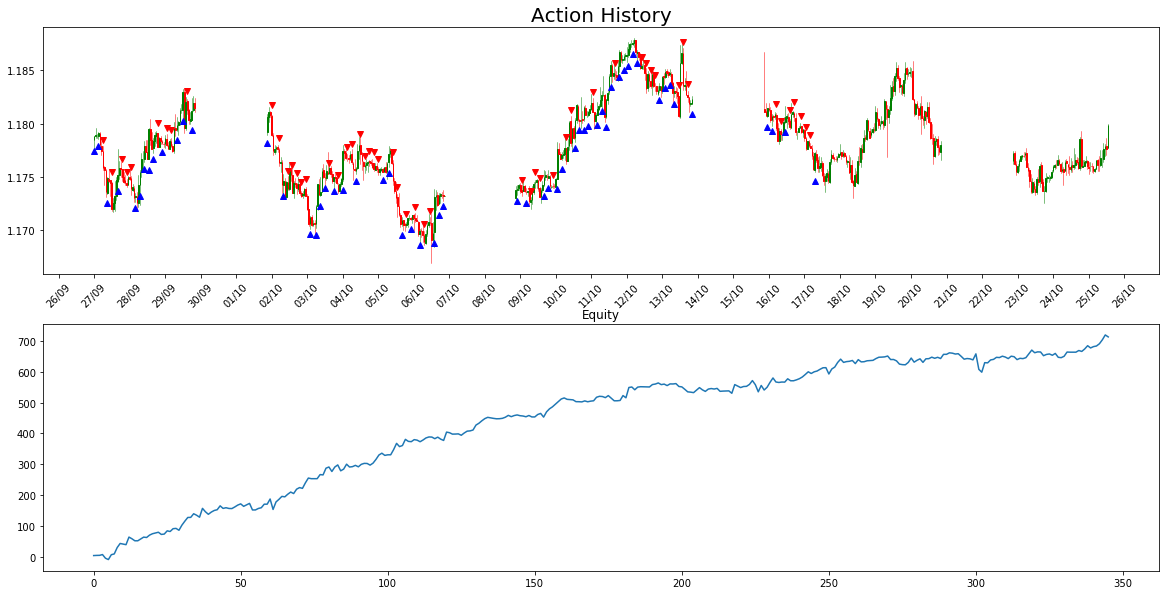

In [6]:
'''Pick a model from a particular episode and test the model on unseen data'''

agent.episodeReview(37)

INFO:tensorflow:Restoring parameters from C:\Users\Henry\Documents\Python Stuff\Upwork Trial\Forex Ai\github\tradingtensors\Examples\Models\2155_Episode37.ckpt
Summary Statistics for Episode 0 

Total Trades            | 48        (Buy)20       (Sell)28 
Profit (in pips)        | 135.50   (Buy)87.50   (Sell)48.00
Win Ratio               | 56.25%    (Buy)60.00%   (Sell)53.57 %
Average Trade Duration  | 3.00


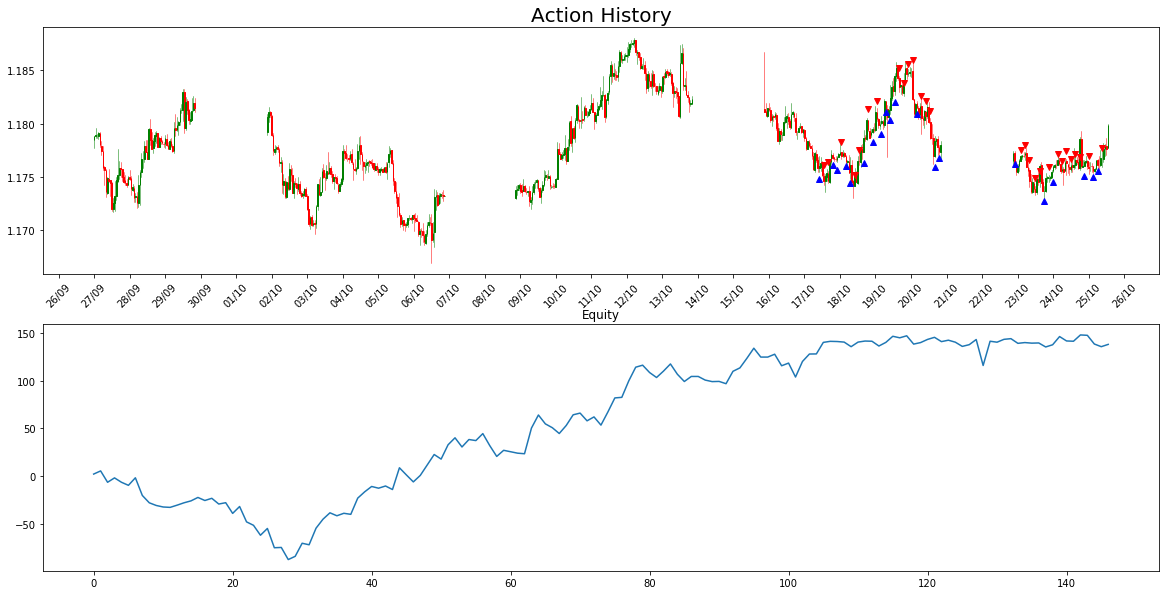

In [7]:
'''Testing!'''

agent.test(37)

# Live Trading

When you feel ready, pick this model and go live!

In [ ]:
'''
Under the hood:
2 threads running, one to 'listen' to new candle events, and another to process the new candle and execute trade
Note: Normalize new data set with train_set mean and std
'''

agent.liveTrading(
    MODEL_EPS = 45 #Select the Model # (Training episode)
)